In [1]:
import polars as pl
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from mySSA import mySSA
%load_ext autoreload
%autoreload 2

In [2]:
df = pl.read_parquet("/home/alqua/Git/edge_exploration/sym_df_1m_res_with_inflow.parquet")

In [3]:
df_inflow_resampled = df.group_by_dynamic(index_column="time", every="15m", check_sorted=False).agg(pl.col("inflow").mean())
df_precip_resampled = df.group_by_dynamic(index_column="time", every="15m", check_sorted=False).agg(pl.col("precip_past1min").sum())

In [7]:
sym_df_15m = df_inflow_resampled.join(df_precip_resampled, on="time", how="inner")

In [10]:
inflow = sym_df_15m[["inflow", "time"]].to_pandas().set_index("time")
#inflow_test = sym_df_15m[["inflow", "time"]][1000:2000].to_pandas().set_index("time")
inflow_sliced = inflow[:2000]

In [11]:
ssa = mySSA(inflow_sliced)
ssa.embed(embedding_dimension=200, suspected_frequency= None, verbose=True)
ssa.decompose(verbose = False)
streams5 = [i for i in range(10)]
reconstr = ssa.view_reconstruction(*[ssa.Xs[i] for i in streams5], names=streams5, return_df=True, plot=False)
#yhat = ssa.forecast_recurrent(steps_ahead=200, singular_values=streams5, plot=False, return_df=True)



----------------------------------------
EMBEDDING SUMMARY:
Embedding dimension	:  200
Trajectory dimensions	: (200, 1801)
Complete dimension	: (200, 1801)
Missing dimension     	: (200, 0)


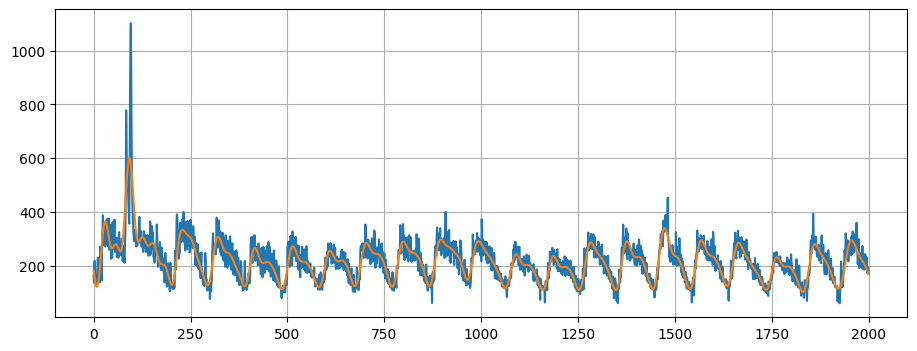

In [17]:
plt.plot(inflow_sliced.values, label="Original")
plt.plot(reconstr, label="SSA Reconstructed")
plt.grid()